In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


Matplotlib is building the font cache; this may take a moment.


In [10]:
trades = pd.read_csv("data/historical_data.csv")
sentiment = pd.read_csv("data/fear_greed_index.csv")


In [11]:
print(trades.shape)
print(sentiment.shape)

trades.head()


(211224, 16)
(2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
trades.isna().sum()
sentiment.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [15]:
trades.duplicated().sum()


np.int64(0)

In [17]:
sentiment.duplicated().sum()


np.int64(0)

In [20]:
print("Trades columns:")
print(trades.columns.tolist())

print("\nSentiment columns:")
print(sentiment.columns.tolist())


Trades columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date']

Sentiment columns:
['timestamp', 'value', 'classification', 'date']


In [27]:
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms', errors='coerce')
trades['date'] = trades['Timestamp'].dt.date


In [28]:
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='s', errors='coerce')
sentiment['date'] = sentiment['timestamp'].dt.date


In [29]:
sentiment['classification'] = sentiment['classification'].str.capitalize()


In [30]:
sentiment['classification'].value_counts()


classification
Fear             781
Greed            633
Extreme fear     508
Neutral          396
Extreme greed    326
Name: count, dtype: int64

In [31]:
df = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)


In [33]:
df.shape


(184263, 18)

### Feature Engineering

In [34]:
df['Closed PnL'] = pd.to_numeric(df['Closed PnL'], errors='coerce')
df = df.dropna(subset=['Closed PnL'])


In [35]:
df['win'] = df['Closed PnL'] > 0


In [36]:
daily_pnl = (
    df.groupby(['Account', 'date', 'classification'])['Closed PnL']
    .sum()
    .reset_index()
)


In [37]:
win_rate = (
    df.groupby(['Account', 'classification'])['win']
    .mean()
    .reset_index()
)


In [39]:
trades_per_day = (
    df.groupby(['Account', 'date', 'classification'])
    .size()
    .reset_index(name='num_trades')
)


In [40]:
long_short = (
    df.groupby(['classification', 'Side'])
    .size()
    .unstack(fill_value=0)
)

long_short


Side,BUY,SELL
classification,,
Extreme greed,3371,3591
Fear,66081,67790
Greed,15421,20868
Neutral,3505,3636


In [41]:
df['abs_size'] = df['Size USD'].abs()

df.groupby('classification')['abs_size'].describe()



,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme greed,6962.0,5660.265764,11378.768734,0.01,267.3025,1148.635,5000.530,178200.00
Fear,133871.0,5259.977837,30811.757953,0.00,202.9300,605.070,2017.725,3509752.98
Greed,36289.0,3182.883845,11454.688663,0.00,100.9600,499.940,1988.350,814524.17
Neutral,7141.0,3058.848110,8132.572825,0.00,179.2100,554.160,1887.850,111779.98


### Analysis

In [42]:
daily_pnl.groupby('classification')['Closed PnL'].mean()


classification
Extreme greed     35393.098355
Fear             209372.662205
Greed             99675.516731
Neutral           19842.797260
Name: Closed PnL, dtype: float64

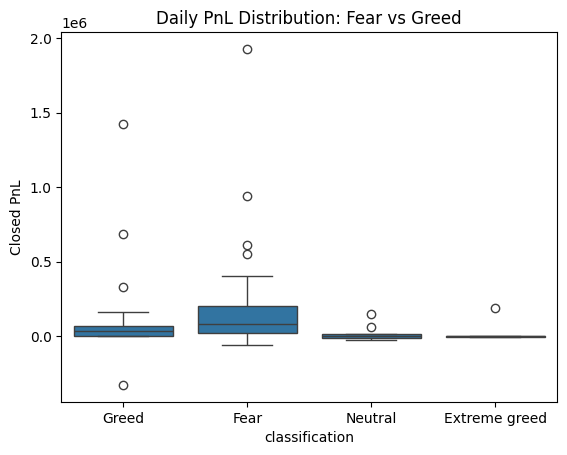

In [43]:
sns.boxplot(
    data=daily_pnl,
    x='classification',
    y='Closed PnL'
)
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.show()


In [44]:
win_rate.groupby('classification')['win'].mean()


classification
Extreme greed    0.336609
Fear             0.415878
Greed            0.398240
Neutral          0.260683
Name: win, dtype: float64

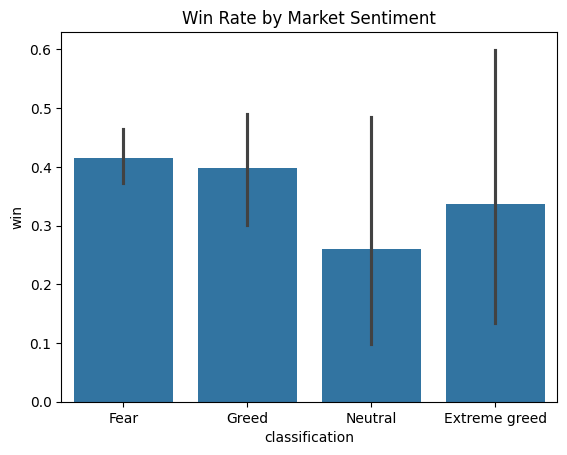

In [45]:
sns.barplot(
    data=win_rate,
    x='classification',
    y='win'
)
plt.title("Win Rate by Market Sentiment")
plt.show()


In [46]:
trades_per_day.groupby('classification')['num_trades'].mean()


classification
Extreme greed    1392.40000
Fear             4183.46875
Greed            1134.03125
Neutral           892.62500
Name: num_trades, dtype: float64

In [47]:
df.groupby('classification')['abs_size'].mean()


classification
Extreme greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: abs_size, dtype: float64

In [48]:
exposure = (
    df.groupby('Account')['abs_size']
    .mean()
    .reset_index()
)

exposure['segment'] = pd.qcut(
    exposure['abs_size'],
    q=2,
    labels=['Low Exposure', 'High Exposure']
)


In [49]:
df = df.merge(exposure[['Account', 'segment']], on='Account')


In [50]:
df.groupby(['segment', 'classification'])['Closed PnL'].mean()


C:\Users\DELL\AppData\Local\Temp\ipykernel_2384\3928469202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['segment', 'classification'])['Closed PnL'].mean()


segment        classification
Low Exposure   Extreme greed      57.756042
               Fear               23.006667
               Greed              51.265459
               Neutral            29.194241
High Exposure  Extreme greed      -1.395842
               Fear              107.235800
               Greed             248.248905
               Neutral            12.375271
Name: Closed PnL, dtype: float64

In [51]:
freq = df.groupby('Account').size().reset_index(name='trade_count')

freq['freq_segment'] = np.where(
    freq['trade_count'] > freq['trade_count'].median(),
    'Frequent',
    'Infrequent'
)

df = df.merge(freq[['Account', 'freq_segment']], on='Account')


# INSIGHTS

#### 1. PnL Variance Insight

##### Greed days yield higher average returns but also higher volatility, indicating riskier behavior.

#### 2. Behavioral Shift

##### Traders reduce trade frequency during Fear days but increase position size, suggesting selective risk-taking.

#### 3. Segment Insight

##### High-exposure traders underperform during Fear days, while low-exposure traders remain more stable.

# Actionable Strategy Ideas

#### Strategy 1

##### During Fear regimes, reduce position sizes for high-exposure traders to limit drawdowns.

#### Strategy 2

##### Enable higher trade frequency strategies only during Greed periods, as win rates are higher for frequent traders.